<a href="https://colab.research.google.com/github/AshHydroCoder/GRACE-Downscaler/blob/master/Download%20GES_DISC%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xarray netCDF4 matplotlib cartopy
from google.colab import drive
import requests
import os
import re
import xarray as xr
import os
#Extent 77,24,89,30

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount('root')

Mounted at /content/drive
Mounted at root


# FLDAS

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to the text file containing URLs
url_file_path = '/content/drive/MyDrive/Thesis/FLDAS 0.1.txt'

# Folder to save downloaded files
download_folder = '/content/drive/MyDrive/Thesis/RAW/FLDAS 0.1'

# Ensure the download folder exists
os.makedirs(download_folder, exist_ok=True)

# Read URLs from the text file
with open(url_file_path, 'r') as f:
    urls = f.readlines()

# Loop through each URL and download the file
for url in urls:
    url = url.strip()  # Remove any leading/trailing whitespace or newline characters
    # Extract the date (e.g., 200301) from the URL
    match = re.search(r'FLDAS_NOAH01_C_GL_M\.A(\d{6})\.', url)
    if match:
        date_str = match.group(1)  # Get the date string (YYYYMM)
        filename = f"{date_str}.nc"  # Construct the filename
        file_path = os.path.join(download_folder, filename)  # Full file path

        # Download the file
        try:
            result = requests.get(url)
            result.raise_for_status()  # Raise an error for HTTP issues
            with open(file_path, 'wb') as f:
                f.write(result.content)
            print(f"Downloaded: {filename} to {file_path}")
        except requests.RequestException as e:
            print(f"Failed to download {url}: {e}")
    else:
        print(f"Date not found in URL: {url}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Date not found in URL: https://hydro1.gesdisc.eosdis.nasa.gov/data/FLDAS/FLDAS_NOAH01_C_GL_M.001/doc/README_FLDAS.pdf
Downloaded: 200301.nc to /content/drive/MyDrive/Thesis/RAW/FLDAS 0.1/200301.nc
Downloaded: 200302.nc to /content/drive/MyDrive/Thesis/RAW/FLDAS 0.1/200302.nc
Downloaded: 200303.nc to /content/drive/MyDrive/Thesis/RAW/FLDAS 0.1/200303.nc
Downloaded: 200304.nc to /content/drive/MyDrive/Thesis/RAW/FLDAS 0.1/200304.nc
Downloaded: 200305.nc to /content/drive/MyDrive/Thesis/RAW/FLDAS 0.1/200305.nc
Downloaded: 200306.nc to /content/drive/MyDrive/Thesis/RAW/FLDAS 0.1/200306.nc
Downloaded: 200307.nc to /content/drive/MyDrive/Thesis/RAW/FLDAS 0.1/200307.nc
Downloaded: 200308.nc to /content/drive/MyDrive/Thesis/RAW/FLDAS 0.1/200308.nc
Downloaded: 200309.nc to /content/drive/MyDrive/Thesis/RAW/FLDAS 0.1/200309.nc
Downloaded: 200310.nc to /content/drive/My

In [ ]:
import os
import xarray as xr

# Path to the folder containing the NetCDF files
folder = 'IMERG 0.1'
folder_path = f'/content/drive/MyDrive/Thesis/RAW/{folder}'

# List all NetCDF (.nc and .nc4) files in the folder
files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith((".nc", ".nc4"))]

# Check if files were found
if not files:
    raise FileNotFoundError("No NetCDF (.nc or .nc4) files found in the directory.")

# Combine the NetCDF files
datasets = [xr.open_dataset(file) for file in files]
combined = xr.concat(datasets, dim="time")  # Adjust 'time' if needed

# Save the combined dataset to a new NetCDF file
output_path = f"/content/drive/MyDrive/Thesis/REGRID/{folder}.nc"
combined.to_netcdf(output_path)

print(f"Combined NetCDF file saved at: {output_path}")


Combined NetCDF file saved at: /content/drive/MyDrive/Thesis/REGRID/IMERG 0.1.nc


# IMERG

In [ ]:
import os
import re
import requests

# Path to the text file containing URLs
url_file_path = '/content/drive/MyDrive/Thesis/IMERG 0.1.txt'

# Folder to save downloaded files
download_folder = '/content/drive/MyDrive/Thesis/RAW/IMERG 0.1'

# Ensure the download folder exists
os.makedirs(download_folder, exist_ok=True)

# Read URLs from the text file
with open(url_file_path, 'r') as f:
    urls = f.readlines()

# Loop through each URL and download the file
for url in urls:
    url = url.strip()  # Remove any leading/trailing whitespace or newline characters
    # Extract the date (e.g., 200301) from the URL
    match = re.search(r'3B-MO\.MS\.MRG\.3IMERG\.(\d{6})\d{2}', url)
    if match:
        date_str = match.group(1)  # Get the date string (YYYYMM)
        filename = f"{date_str}.nc"  # Construct the filename
        file_path = os.path.join(download_folder, filename)  # Full file path

        # Download the file
        try:
            result = requests.get(url)
            result.raise_for_status()  # Raise an error for HTTP issues
            with open(file_path, 'wb') as f:
                f.write(result.content)
            print(f"Downloaded: {filename} to {file_path}")
        except requests.RequestException as e:
            print(f"Failed to download {url}: {e}")
    else:
        print(f"Date not found in URL: {url}")


Date not found in URL: https://arthurhou.pps.eosdis.nasa.gov/Documents/IMERG_V07_ATBD_final.pdf
Date not found in URL: https://gpm1.gesdisc.eosdis.nasa.gov/data/GPM_L3/doc/README.GPM.pdf
Downloaded: 200301.nc to /content/drive/MyDrive/Thesis/RAW/IMERG 0.1/200301.nc
Downloaded: 200302.nc to /content/drive/MyDrive/Thesis/RAW/IMERG 0.1/200302.nc
Downloaded: 200303.nc to /content/drive/MyDrive/Thesis/RAW/IMERG 0.1/200303.nc
Downloaded: 200304.nc to /content/drive/MyDrive/Thesis/RAW/IMERG 0.1/200304.nc
Downloaded: 200305.nc to /content/drive/MyDrive/Thesis/RAW/IMERG 0.1/200305.nc
Downloaded: 200306.nc to /content/drive/MyDrive/Thesis/RAW/IMERG 0.1/200306.nc
Downloaded: 200307.nc to /content/drive/MyDrive/Thesis/RAW/IMERG 0.1/200307.nc
Downloaded: 200308.nc to /content/drive/MyDrive/Thesis/RAW/IMERG 0.1/200308.nc
Downloaded: 200309.nc to /content/drive/MyDrive/Thesis/RAW/IMERG 0.1/200309.nc
Downloaded: 200310.nc to /content/drive/MyDrive/Thesis/RAW/IMERG 0.1/200310.nc
Downloaded: 200311.nc t

<xarray.Dataset> Size: 26kB
Dimensions:                (time: 1, bnds: 2, lon: 36, lat: 18)
Coordinates:
  * time                   (time) datetime64[ns] 8B 2003-07-01
  * lon                    (lon) float64 288B 79.62 79.88 80.12 ... 88.12 88.38
  * lat                    (lat) float64 144B 26.12 26.38 26.62 ... 30.12 30.38
Dimensions without coordinates: bnds
Data variables:
    time_bnds              (time, bnds) datetime64[ns] 16B ...
    Evap_tavg              (time, lat, lon) float32 3kB ...
    Qs_tavg                (time, lat, lon) float32 3kB ...
    Qsb_tavg               (time, lat, lon) float32 3kB ...
    RadT_tavg              (time, lat, lon) float32 3kB ...
    SWE_inst               (time, lat, lon) float32 3kB ...
    Tair_f_tavg            (time, lat, lon) float32 3kB ...
    SoilMoi00_10cm_tavg    (time, lat, lon) float32 3kB ...
    SoilMoi10_40cm_tavg    (time, lat, lon) float32 3kB ...
    SoilMoi40_100cm_tavg   (time, lat, lon) float32 3kB ...
    SoilMoi100_2

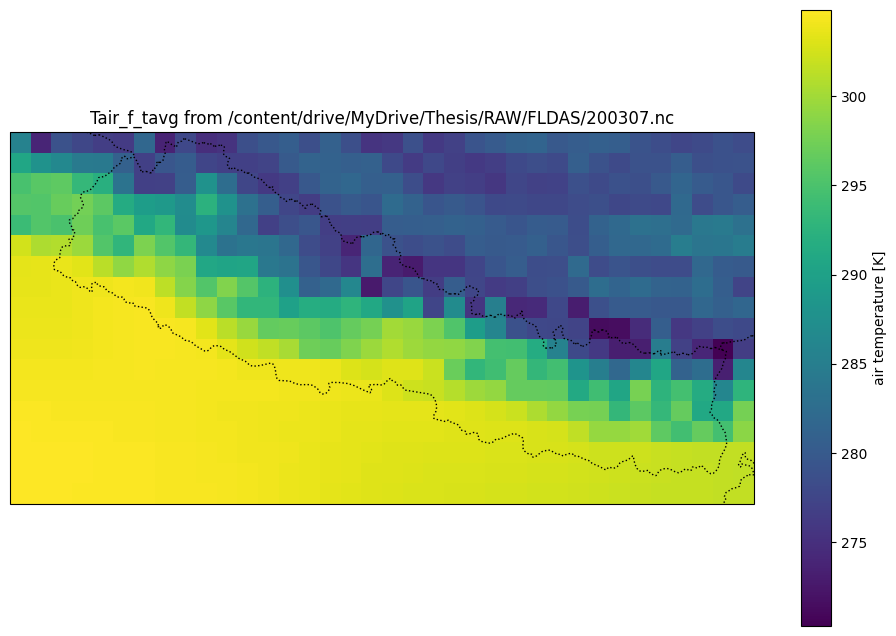

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Replace with the actual path to your .nc file
file_path = '/content/drive/MyDrive/Thesis/RAW/FLDAS/200307.nc'

# Open the .nc file using xarray
dataset = xr.open_dataset(file_path)

# Print the dataset information and values
print(dataset)

# Select a variable to plot (replace 'variable_name' with the actual variable name)
variable_name = 'Tair_f_tavg'
variable_data = dataset[variable_name]

# Create a plot with political boundaries
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree projection

# Plot the variable data
variable_data.plot(ax=ax, transform=ccrs.PlateCarree())

# Add political boundaries
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Add other features if needed (e.g., LAND, RIVERS, etc.)
# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.RIVERS)

# Set plot extent (optional, adjust as needed)
# ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max])

plt.title(f'{variable_name} from {file_path}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
!pip install earthaccess
import earthaccess

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 84.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
auth = earthaccess.login()

In [ ]:
results = earthaccess.search_data(doi = '10.5067/C4IOYF41EEZB',temporal = ('2003-01-01','2003-01-03'),bounding_box = (79,26,89,31))
#download_files = earthaccess.download(results,local_path= '/content/root/MyDrive/Thesis/RAW/FLDAS')
polygon = sg.box(79, 26, 89, 31)

fs = earthaccess.open(results)
ds = xr.open_mfdataset(fs)
ds

QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

<xarray.Dataset> Size: 11GB
Dimensions:                 (time: 4, lat: 3500, lon: 7000, bnds: 2)
Coordinates:
  * time                    (time) datetime64[ns] 32B 2002-12-31 ... 2003-01-03
  * lon                     (lon) float64 56kB 30.0 30.02 30.02 ... 99.98 99.99
  * lat                     (lat) float64 28kB 21.0 21.02 21.02 ... 55.98 56.0
Dimensions without coordinates: bnds
Data variables: (12/28)
    Swnet_tavg              (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    Snowf_tavg              (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    Rainf_tavg              (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    Evap_tavg               (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    Qs_tavg                 (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    Qsb_tavg                (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    ...                      ...
    SoilTemp10_40cm_tavg    (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    SoilMoi40_100cm_tavg    (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    SoilTemp40_100cm_tavg   (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    SoilMoi100_200cm_tavg   (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    SoilTemp100_200cm_tavg  (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    time_bnds               (time, bnds) datetime64[ns] 64B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/29)
    institution:                    NASA GSFC
    missing_value:                  -9999.0
    MAP_PROJECTION:                 EQUIDISTANT CYLINDRICAL
    DX:                             0.01
    DY:                             0.01
    ShortName:                      FLDAS_NOAHMP001_G_CA_D
    ...                             ...
    history:                        created on date: 2003-01-01T00:30:00Z
    Conventions:                    CF-1.10
    SouthernmostLatitude:           21.005f
    WesternmostLongitude:           30.005f
    NorthernmostLatitude:           55.995f
    EasternmostLongitude:           99.995f

In [ ]:
import earthaccess
import xarray as xr
import shapely.geometry as sg

# Authenticate with Earthdata Search
auth = earthaccess.login()

# Define the bounding box coordinates
polygon = sg.box(79, 26, 89, 31)
min_lon, min_lat, max_lon, max_lat = polygon.bounds

# Search for data using bounding box
results = earthaccess.search_data(
    doi='10.5067/C4IOYF41EEZB',
    temporal=('2003-01-01', '2003-01-03'),
    bounding_box=(min_lon, min_lat, max_lon, max_lat)
)

# Open the downloaded files with xarray
fs = earthaccess.open(results)
ds = xr.open_mfdataset(fs)

# Display the dataset
ds

QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

<xarray.Dataset> Size: 11GB
Dimensions:                 (time: 4, lat: 3500, lon: 7000, bnds: 2)
Coordinates:
  * time                    (time) datetime64[ns] 32B 2002-12-31 ... 2003-01-03
  * lon                     (lon) float64 56kB 30.0 30.02 30.02 ... 99.98 99.99
  * lat                     (lat) float64 28kB 21.0 21.02 21.02 ... 55.98 56.0
Dimensions without coordinates: bnds
Data variables: (12/28)
    Swnet_tavg              (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    Snowf_tavg              (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    Rainf_tavg              (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    Evap_tavg               (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    Qs_tavg                 (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    Qsb_tavg                (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    ...                      ...
    SoilTemp10_40cm_tavg    (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    SoilMoi40_100cm_tavg    (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    SoilTemp40_100cm_tavg   (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    SoilMoi100_200cm_tavg   (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    SoilTemp100_200cm_tavg  (time, lat, lon) float32 392MB dask.array<chunksize=(1, 1, 7000), meta=np.ndarray>
    time_bnds               (time, bnds) datetime64[ns] 64B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/29)
    institution:                    NASA GSFC
    missing_value:                  -9999.0
    MAP_PROJECTION:                 EQUIDISTANT CYLINDRICAL
    DX:                             0.01
    DY:                             0.01
    ShortName:                      FLDAS_NOAHMP001_G_CA_D
    ...                             ...
    history:                        created on date: 2003-01-01T00:30:00Z
    Conventions:                    CF-1.10
    SouthernmostLatitude:           21.005f
    WesternmostLongitude:           30.005f
    NorthernmostLatitude:           55.995f
    EasternmostLongitude:           99.995f

In [ ]:
!pip install pydap
from pydap.client import open_url
from pydap.cas.urs import setup_session
import getpass



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.4/115.4 kB 5.4 MB/s eta 0:00:00


In [ ]:

dataset_url = 'https://hydro1.gesdisc.eosdis.nasa.gov/opendap/FLDAS/FLDAS_NOAHMP001_G_CA_D.001/2001/01/FLDAS_NOAHMP001_G_CA_D.A20010101.001.nc.html'

# Prompts for entering Earthdata login credentials
prompts = [
    'Enter NASA Earthdata Login Username \n(or create an account at urs.earthdata.nasa.gov): ',
    'Enter NASA Earthdata Login Password: '
]
username = input(prompts[0])
password = getpass.getpass(prompts[1])
#username = 'Azizh0123'
#password = 'AshishGanesh@123'

# Stream the granule into a "dataset" variable
try:
    session = setup_session(username, password, check_url=dataset_url)
    dataset = open_url(dataset_url, session=session, protocol="dap4")
    print(dataset) # Select a variable and view its data
except AttributeError as e:
    print('Error:', e)
    print('Please verify that the dataset URL points to an OPeNDAP server, the OPeNDAP server is accessible, or that your username and password are correct.')
    raise

Enter NASA Earthdata Login Username 
(or create an account at urs.earthdata.nasa.gov): Azizh0123
Enter NASA Earthdata Login Password: ··········


/usr/local/lib/python3.11/dist-packages/pydap/cas/get_cookies.py:129: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(resp.content, "lxml")


UserWarning: Navigate to https://hydro1.gesdisc.eosdis.nasa.gov/opendap/FLDAS/FLDAS_NOAHMP001_G_CA_D.001/2001/01/FLDAS_NOAHMP001_G_CA_D.A20010101.001.nc.html, login and follow instructions. It is likely that you have to perform some one-time registration steps before acessing this data.

In [ ]:
!pip install podaac-data-subscriber


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.0 MB/s eta 0:00:00
  Created wheel for curlify: filename=curlify-2.2.1-py3-none-any.whl size=2667 sha256=f0acae209d8016c32b087ffccff4b78eb4266670c97dbeb4640a3869e68f7439
  Stored in directory: /root/.cache/pip/wheels/e1/6b/61/f8560ac125bd64f2b87b9af2f9ae08f8dbaec154f583a9e301
Successfully built curlify
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: progressbar2
    Found existing installation: progressbar2 4.5.0
    Uninstalling progressbar2-4.5.0:
      Successfully uninstalled progressbar2-4.5.0


In [ ]:
!chmod og-rw /root/.netrc

In [ ]:
!podaac-data-downloader -c TELLUS_GLDAS-NOAH-3.3_TWS-ANOMALY_MONTHLY -d ./data --start-date 2002-04-04T00:00:00Z --end-date 2002-04-11T00:00:00Z -b="-180,-89.5,180,89.5"

[2025-02-01 05:03:44,444] {podaac_data_downloader.py:146} INFO - NOTE: Making new data directory at ./data(This is the first run.)
[2025-02-01 05:03:45,050] {podaac_data_downloader.py:317} INFO - Found 1 total files to download
[2025-02-01 05:03:48,149] {podaac_data_downloader.py:358} INFO - 2025-02-01 05:03:48.149503 SUCCESS: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/TELLUS_GLDAS-NOAH-3.3_TWS-ANOMALY_MONTHLY/GLDAS-NOAH_1deg_tws_anomaly_monthly_2002094-2002120.nc
[2025-02-01 05:03:48,149] {podaac_data_downloader.py:369} INFO - Downloaded Files: 1
[2025-02-01 05:03:48,149] {podaac_data_downloader.py:370} INFO - Failed Files:     0
[2025-02-01 05:03:48,150] {podaac_data_downloader.py:371} INFO - Skipped Files:    0
[2025-02-01 05:03:48,150] {podaac_data_downloader.py:177} INFO - Success Count: 1
[2025-02-01 05:03:48,348] {podaac_data_downloader.py:186} INFO - END


